## Assignment 1 Solutions



In [0]:
#@title Import { display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

### Problem 1

Variance of a sum <br>

1.   Show that the variance of a sum is var [X + Y] = var[X] + var[Y] + 2cov[X, Y] , where cov[X, Y] is the covariance between X and Y.



**Solution:** <br>



> Based on the definition of variance:
> $Var(X+Y) = E[(X + Y − E[X+Y])^2] = E[(X− μ_X + Y − μ_Y)^2] = E [(X − μ_X)^2 + (Y − μ_Y)^2 + 2(X − μ_X)(Y − μ_Y)]$ <br><br>
According to the linearity:
$Var(X+Y)=E[(X − E[X])^2]+E[(Y − E[Y])^2]+2E[(X − μ_X)(Y − μ_Y)]
= Var(X) + Var(Y) + 2Cov(X, Y)$




2.   In Python, generate N=100 random variables X, Y from multivariate Gaussian. Assume fixed initial values of your choice for  mean[X], mean[Y], var[X], var [Y ] and cov [X, Y]. Now, compute empirical variance and covariances (from your data) and show that above formula is correct.



**Solution:**

In [0]:
# Set the random seed to make result reproducible
np.random.seed(123)

# For random variable X
X = np.random.normal(0, 1, size=100)
var_X = np.var(X)

# For random variable Y
Y = np.random.normal(2, 2, size=100)
var_Y = np.var(Y)

# Calculate 𝑉𝑎𝑟(𝑋+𝑌) and 𝐶𝑜𝑣(𝑋,𝑌) respectively
var_XY = np.var(X + Y)
cov_XY = np.cov(X, Y)[0,1]

# Show that above formula is correct
print("Based on computed empirical variance and covariances:")
print("𝑉𝑎𝑟(𝑋+𝑌) = {:.2f}".format(var_XY))
print("𝑉𝑎𝑟(𝑋)+𝑉𝑎𝑟(𝑌)+2𝐶𝑜𝑣(𝑋,𝑌) = {:.2f}".format(var_X + var_Y + 2*cov_XY))
print("The results show that above formula is correct.")

Based on computed empirical variance and covariances:
𝑉𝑎𝑟(𝑋+𝑌) = 4.95
𝑉𝑎𝑟(𝑋)+𝑉𝑎𝑟(𝑌)+2𝐶𝑜𝑣(𝑋,𝑌) = 4.95
The results show that above formula is correct.


### Problem 2

Bayesian analysis of the exponential distribution <br>
<br>
A lifetime X of a machine is modeled by an exponential distribution with unknown parameter θ. The likelihood is: <br> 
$p(x|θ) = θe^{−θx}$ for x ≥ 0, θ > 0.



1. Show that the MLE is $\hat{θ}$ = 1/$\bar{x}$, where $\bar{x} = \frac{1}{N}\displaystyle\sum_{i=1}^{N}x_i$

**Solution:** <br>

> Given observed iid values $X_1 = x_1, X_2 = x_2, . . . , X_N = x_N$, the likelihood is: <br>
$p(x_1,...x_N|θ) = (θe^{−θx_1}) \times...\times (θe^{−θx_N})$ for x ≥ 0, θ > 0 <br>
We often use the fact that the logarithm is an increasing function so it will be equivalent to maximise the log likelihood: <br>
$log(p(x_1,...x_N|θ)) = log(θe^{−θx_1}) +...+ log(θe^{−θx_N}) = Nlog(θ) - θ(x_1 +... + x_N)$ <br>
We need to find the maximum by finding the derivative: <br>
$\frac{d}{dθ}log(p(x_1,...x_N|θ)) = \frac{N}{θ} - (x_1 +...+ x_N) = 0$ <br>
From which we can get the MLE is $\hat{θ}$ = 1/$\bar{x}$, where $\bar{x} = \frac{1}{N}\displaystyle\sum_{i=1}^{N}x_i$



2. Suppose we observe $X_1 = 5, X_2 = 6, X_3 = 4$ (the lifetimes (in years) of 3 different iid machines).
What is the MLE given this data?



**Solution:** <br>

In [0]:
# Lifetimes (in years) of 3 different iid machines
X1 = 5
X2 = 6
X3 = 4

# MLE given this data
theta_hat = 1. / (X1 + X2 + X3)

# Print the result
print("The MLE given this data is:= {:.2f}".format(theta_hat))

The MLE given this data is:= 0.07




3. Assume that an expert believes θ should have a prior distribution that is also exponential <br>
$p(θ) = θ^3e^{−3θ}$ <br>
What is the posterior?


**Solution:** <br>

> We already know that: <br>
Prior: $p(θ) = θ^3e^{−3θ}$ <br>
Likelihood: $p(x|θ) = θe^{−θx}$ for x ≥ 0, θ > 0 <br>
According to the Bayes Rule: <br>
$p(θ|x) = \frac{p(x|θ)p(θ)}{p(X)}\propto p(x|θ)p(θ) \propto θ^4e^{-(x+3)θ}$ 



4. Is the exponential prior conjugate to the exponential likelihood?



**Solution:** <br>



> Yes, according to question 3, we can find that posterior is also exponential.



### Problem 3

The following labeled data is given: <br>
x={10.9, 12.4, 13.5, 14.6, 14.8, 15.6, 16.2, 17.5, 18.3, 18.6} <br>
y={24.8, 30.0, 31.0, 29.3, 35.9, 36.9, 42.5, 37.9, 38.9, 40.5}.<br>
Write python code to perform linear and ridge regression. Show R-squared error and adjusted R-squared error and explain results. 

**Solution:** <br>



1.   Linear Regression



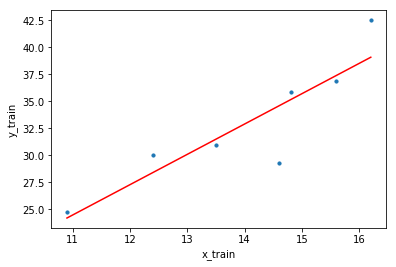

Slope:2.81
Intercept:-6.40


Error on training set:
R-squared error on training set: 6.23
Adjusted R-squared error on training set: 0.79


Error on test set:
R-squared error on test set: 29.64
Adjusted R-squared error on test set: -24.85


In [0]:
# Training set
x_train = np.array([10.9, 12.4, 13.5, 14.6, 14.8, 15.6, 16.2]).reshape(-1, 1)
y_train = np.array([24.8, 30.0, 31.0, 29.3, 35.9, 36.9, 42.5]).reshape(-1, 1)

# Test set
x_test = np.array([17.5, 18.3, 18.6]).reshape(-1, 1)
y_test = np.array([37.9, 38.9, 40.5]).reshape(-1, 1)

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_train)

# R-squared error and adjusted R-squared error on training set
rmse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)

# data points
plt.scatter(x_train, y_train, s=10)
plt.xlabel('x_train')
plt.ylabel('y_train')

# predicted values
plt.plot(x_train, y_predicted, color='r')
plt.show()

# printing values
print('Slope:{:.2f}'.format(regression_model.coef_[0,0]))
print('Intercept:{:.2f}'.format(regression_model.intercept_[0]))
print("\n")
print("Error on training set:")
print('R-squared error on training set: {:.2f}'.format(rmse))
print('Adjusted R-squared error on training set: {:.2f}'.format(r2))

# Model evaluation using test set
y_predicted = regression_model.predict(x_test)

# R-squared error and adjusted R-squared error on training set
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print("\n")
print("Error on test set:")
print('R-squared error on test set: {:.2f}'.format(rmse))
print('Adjusted R-squared error on test set: {:.2f}'.format(r2))

2.   Ridge Regression

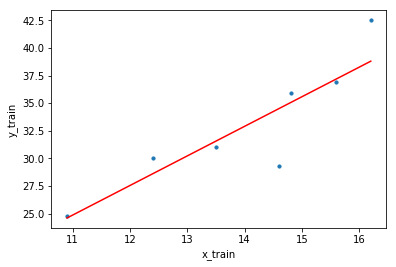

Slope:2.68
Intercept:-4.59


Error on training set:
R-squared error on training set: 6.28
Adjusted R-squared error on training set: 0.79


Error on test set:
R-squared error on test set: 24.12
Adjusted R-squared error on test set: -20.04


In [0]:
# Training set
x_train = np.array([10.9, 12.4, 13.5, 14.6, 14.8, 15.6, 16.2]).reshape(-1, 1)
y_train = np.array([24.8, 30.0, 31.0, 29.3, 35.9, 36.9, 42.5]).reshape(-1, 1)

# Test set
x_test = np.array([17.5, 18.3, 18.6]).reshape(-1, 1)
y_test = np.array([37.9, 38.9, 40.5]).reshape(-1, 1)

# Model initialization
regression_model = Ridge()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_train)

# R-squared error and adjusted R-squared error on training set
rmse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)

# data points
plt.scatter(x_train, y_train, s=10)
plt.xlabel('x_train')
plt.ylabel('y_train')

# predicted values
plt.plot(x_train, y_predicted, color='r')
plt.show()

# printing values
print('Slope:{:.2f}'.format(regression_model.coef_[0,0]))
print('Intercept:{:.2f}'.format(regression_model.intercept_[0]))
print("\n")
print("Error on training set:")
print('R-squared error on training set: {:.2f}'.format(rmse))
print('Adjusted R-squared error on training set: {:.2f}'.format(r2))

# Model evaluation using test set
y_predicted = regression_model.predict(x_test)

# R-squared error and adjusted R-squared error on training set
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print("\n")
print("Error on test set:")
print('R-squared error on test set: {:.2f}'.format(rmse))
print('Adjusted R-squared error on test set: {:.2f}'.format(r2))

As we can see, compare to unregularized model perform better on fitting traing set, but ridge model perform better on fitting test set. This is because ridge model add a regularized part which can solve overfitting problem of regression.

### Problem 4

Start with the code from Fig 6.11 and 6.12 from the text book. For the parameters presented in Fig 6.12b compute standard error (see section 6.3.1.3) and predict probability of next data point to be equal one.

**Solution:** <br>

Figure 6.11: Updating a uniform Beta(1,1) prior with a Bernoulli likelihood with sufficient statistics

In [0]:
# Points where we evaluate the pdf
x = np.linspace(0.001, .999, 100)

# Given an alpha parameter, this returns a pdf function
def MakeBeta(alpha):
    def Beta(y):
        return dirichlet.pdf([y, 1 - y], alpha)
    Beta = np.vectorize(Beta)
    return Beta

# Makes strings for the legend:
def MakeLabel(Data,which):
    alpha = Data[which]
    lab = which + " Be(" + str(alpha[0]) + ", " + str(alpha[1]) + ")"
    return lab

# Forms graph give the parameters of the prior, likelihood and posterior:
def MakeGraph(Data,SaveName):
    prior = MakeBeta(Data['prior'])(x)
    likelihood = MakeBeta(Data['lik'])(x)
    posterior = MakeBeta(Data['post'])(x)

    fig, ax = plt.subplots()
    ax.plot(x, prior, 'r', label=MakeLabel(Data, "prior"), linewidth=2.0)
    ax.plot(x, likelihood, 'k--', label=MakeLabel(Data, "lik"), linewidth=2.0)
    ax.plot(x, posterior, 'b--', label=MakeLabel(Data, "post"), linewidth=2.0)
    ax.legend(loc='upper left', shadow=True)
    plt.show()

(a): N1 = 4, N0 = 1

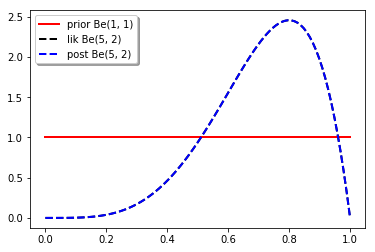

In [0]:
# N1 = 4, N0 = 1
Data1 = {'prior': [1, 1],
         'lik': [5, 2],
         'post': [5, 2]}

MakeGraph(Data1, "betaPost1")
plt.show()

(b): N1 = 40, N0 = 10

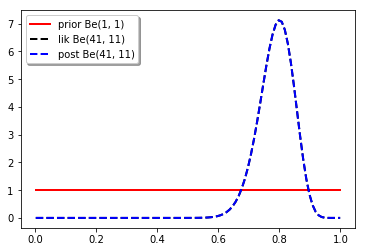

In [0]:
# N1 = 40, N0 = 10
Data2 = {'prior': [1, 1],
         'lik': [41, 11],
         'post': [41, 11]}

MakeGraph(Data2, "betaPost2")
plt.show()

Note: Since we are using a uniform prior, the likelihood and posterior have exactly the same shape (so the black dotted line, representing the likelihood, is not visible).

Figure 6.12:  Updating a Beta(2,2) prior with a Bernoulli likelihood with sufficient statistics.

(a): N1 = 4, N0 = 1

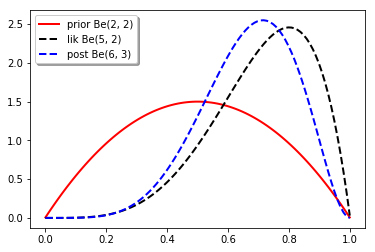

In [0]:
# N1 = 4, N0 = 1
Data3 = {'prior': [2, 2],
         'lik': [5, 2],
         'post': [6, 3]}

MakeGraph(Data3, "betaPost3")

plt.show()

(b): N1 = 40, N0 = 10

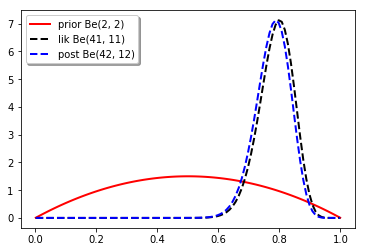

In [0]:
# N1 = 40, N0 = 10
Data4 = {'prior': [2, 2],
         'lik': [41, 11],
         'post': [42, 12]}

MakeGraph(Data4, "betaPost4")

plt.show()

Standard error of parameters presented in Fig 6.12b, which is just the posterior standard deviaton:

In [0]:
# Compute posterior
posterior = MakeBeta(Data4['post'])(x)

# Compute standard error
SE = np.std(posterior)

print("Standard error is: {:.2f}".format(SE))

Standard error is: 2.01


Predict probability of next data point to be equal one: <br>
$ p(x_{N+1} = 1|X, α, β) = \int_{0}^{1} p(x_{N+1} = 1|θ) p(θ|X, α, β)dθ = E[θ|X] = \frac{α + N_1}{α + β + N}$

In [0]:
# Predict probability of next data point to be equal one
prob = (42 + 40) / (42 + 12 + 10 + 40)

print("Probability of next data point to be equal one is: {:.2f}".format(prob))

Probability of next data point to be equal one is: 0.79
